<a href="https://colab.research.google.com/github/Danitlopes/An-lise-Prouni/blob/main/Prouni_2016_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#INSTALANDO BIBLIOTECAS
%pip install pandas
%pip install matplotlib

In [2]:
#IMPORTANDO BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exploração e Limpeza da Base

In [27]:
#Imprimindo cabeçalho, forma, colunas e tipos para entender melhor a composição da base
df = pd.read_csv('pda-prouni-2016-2019.csv',  encoding='utf-8-sig', sep=';')
df.to_csv('pda-prouni-2016-2019_treated.csv' , index=False, encoding='utf-8-sig', sep=';')
print(df.head())
print(df.shape)
print(df.columns)
print(df.dtypes)

   ANO_CONCESSAO_BOLSA  CODIGO_EMEC_IES_BOLSA  \
0                 2016                     20   
1                 2016                     20   
2                 2016                     20   
3                 2016                     20   
4                 2016                    423   

                                      NOME_IES_BOLSA         TIPO_BOLSA  \
0                        UNIVERSIDADE DE PASSO FUNDO  BOLSA PARCIAL 50%   
1                        UNIVERSIDADE DE PASSO FUNDO     BOLSA INTEGRAL   
2                        UNIVERSIDADE DE PASSO FUNDO  BOLSA PARCIAL 50%   
3                        UNIVERSIDADE DE PASSO FUNDO  BOLSA PARCIAL 50%   
4  UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...  BOLSA PARCIAL 50%   

  MODALIDADE_ENSINO_BOLSA    NOME_CURSO_BOLSA NOME_TURNO_CURSO_BOLSA  \
0              PRESENCIAL       Administração                Noturno   
1              PRESENCIAL       Administração                Noturno   
2              PRESENCIAL       Admini

O dataset contém 942.485 registros e 15 colunas que abrangem dados sobre bolsas do prouni, beneficiários, instituições, localização, entre outros. A análise dos tipos e nomes das colunas permitiu compreender a estrutura dos dados, destacando a diversidade de informações disponíveis e a necessidade de tratamentos específicos para cada variável em análises futuras.

In [28]:
#Imprimindo a quantidade de bolsas concedidas por ano
bolsas_ano = df['ANO_CONCESSAO_BOLSA'].value_counts().sort_index()
print(bolsas_ano)

ANO_CONCESSAO_BOLSA
2016    239262
2017    236636
2018    241032
2019    225555
Name: count, dtype: int64


Os valores anuais de concessão de bolsas entre 2016 e 2019 apresentam quantidades próximas, sem grandes variações aparentes. Esse padrão sugere que o volume de bolsas se manteve relativamente constante nesse período, mas análises adicionais seriam necessárias para confirmar quaisquer tendências ou causas.

In [29]:
#Verificando a quantidade de bolsas de cada curso
bolsas_curso = df['NOME_CURSO_BOLSA'].value_counts().sort_index()
print(bolsas_curso)

NOME_CURSO_BOLSA
  Tradução E Interpretação               2
 Engenharia Aeronáutica E Espaço        20
 Engenharia Biomédica                   13
 Engenharia Civil E Ambiental            7
 Engenharia Da Produção E Qualidade      4
                                      ... 
Visagismo E Terapias Capilares          15
Viticultura E Enologia                   3
Web Design                              15
Zootecnia                              460
Óptica E Optometria                     39
Name: count, Length: 2286, dtype: int64


In [30]:
#Analisando se há valores nulos em cada coluna
for coluna, valores in df.items():
    print(f"Coluna: {coluna}")
    print("Nulos: "+ str(df[coluna].isnull().sum())+"\n")

Coluna: ANO_CONCESSAO_BOLSA
Nulos: 0

Coluna: CODIGO_EMEC_IES_BOLSA
Nulos: 0

Coluna: NOME_IES_BOLSA
Nulos: 0

Coluna: TIPO_BOLSA
Nulos: 0

Coluna: MODALIDADE_ENSINO_BOLSA
Nulos: 0

Coluna: NOME_CURSO_BOLSA
Nulos: 44

Coluna: NOME_TURNO_CURSO_BOLSA
Nulos: 0

Coluna: CPF_BENEFICIARIO_BOLSA
Nulos: 0

Coluna: SEXO_BENEFICIARIO_BOLSA
Nulos: 0

Coluna: RACA_BENEFICIARIO_BOLSA
Nulos: 0

Coluna: DT_NASCIMENTO_BENEFICIARIO
Nulos: 0

Coluna: BENEFICIARIO_DEFICIENTE_FISICO
Nulos: 0

Coluna: REGIAO_BENEFICIARIO_BOLSA
Nulos: 0

Coluna: SIGLA_UF_BENEFICIARIO_BOLSA
Nulos: 0

Coluna: MUNICIPIO_BENEFICIARIO_BOLSA
Nulos: 0



Na análise das colunas do DataFrame, foi identificado que a coluna NOME_CURSO_BOLSA possui 44 valores nulos, enquanto as demais colunas não apresentam dados ausentes. Essa informação é importante para decisões futuras sobre limpeza ou tratamento dos dados, garantindo a qualidade das análises subsequentes.

In [31]:
#Removendo os valores nulos das colunas de curso e data de nascimento
df = df.dropna(subset=['NOME_CURSO_BOLSA', 'DT_NASCIMENTO_BENEFICIARIO'])
print(df.isnull().sum())

ANO_CONCESSAO_BOLSA               0
CODIGO_EMEC_IES_BOLSA             0
NOME_IES_BOLSA                    0
TIPO_BOLSA                        0
MODALIDADE_ENSINO_BOLSA           0
NOME_CURSO_BOLSA                  0
NOME_TURNO_CURSO_BOLSA            0
CPF_BENEFICIARIO_BOLSA            0
SEXO_BENEFICIARIO_BOLSA           0
RACA_BENEFICIARIO_BOLSA           0
DT_NASCIMENTO_BENEFICIARIO        0
BENEFICIARIO_DEFICIENTE_FISICO    0
REGIAO_BENEFICIARIO_BOLSA         0
SIGLA_UF_BENEFICIARIO_BOLSA       0
MUNICIPIO_BENEFICIARIO_BOLSA      0
dtype: int64


Para garantir a qualidade e confiabilidade das análises, foram removidos os 44 registros com valores nulos na coluna NOME_CURSO_BOLSA, já que a ausência dessa informação compromete a interpretação dos dados relacionados aos cursos.

In [32]:
# Contar o número de beneficiários por faixa etária
df["DT_NASCIMENTO_BENEFICIARIO"] = pd.to_datetime(
    df["DT_NASCIMENTO_BENEFICIARIO"], errors="coerce", dayfirst=True
)

# Calcular a idade com base no ano de concessão da bolsa
df.loc[:, "IDADE"] = df["ANO_CONCESSAO_BOLSA"] - df["DT_NASCIMENTO_BENEFICIARIO"].dt.year

# Criar faixas etárias
bins = [0, 17, 20, 25, 30, 40, 50, 60, 100]
labels = ["≤17", "18–20", "21–25", "26–30", "31–40", "41–50", "51–60", "60+"]
df.loc[:, "FAIXA_ETARIA"] = pd.cut(df["IDADE"], bins=bins, labels=labels, right=True)

# Contar o número de beneficiários por faixa etária
faixa_counts = df["FAIXA_ETARIA"].value_counts().sort_index()
print(faixa_counts)

FAIXA_ETARIA
≤17        2793
18–20    102062
21–25     70157
26–30     30536
31–40     25095
41–50      7055
51–60      1407
60+         113
Name: count, dtype: int64


A análise da faixa etária revela que a maioria dos beneficiários do Prouni tem entre 18 e 25 anos, concentrando cerca de 70% dos participantes.
Esses dados confirmam que o programa cumpre fortemente seu papel de facilitar o acesso ao ensino superior para jovens recém-egressos do ensino médio.

O segundo grupo mais representativo está entre 26 e 40 anos, o que indica uma presença relevante de adultos que retomam os estudos — possivelmente buscando qualificação profissional ou uma segunda graduação.

Já as faixas acima de 40 anos (principalmente 50+) possuem baixa participação, sugerindo que há barreiras de acesso para adultos mais velhos, como dificuldades financeiras, familiares ou falta de incentivo para o retorno aos estudos.

In [33]:
# Remover os valores nulos da coluna de curso
df = df.dropna(subset=['NOME_CURSO_BOLSA'])

# Padronizar a coluna de sexo
df["SEXO_BENEFICIARIO_BOLSA"] = df["SEXO_BENEFICIARIO_BOLSA"].str.strip().str.capitalize()

sex_mapping = {'F': 'Feminino', 'M': 'Masculino'}
df['SEXO_BENEFICIARIO_BOLSA'] = df['SEXO_BENEFICIARIO_BOLSA'].replace(sex_mapping)

# Contar o número de beneficiários por sexo
sexo_counts = df["SEXO_BENEFICIARIO_BOLSA"].value_counts()
sexo_percent = (sexo_counts / sexo_counts.sum()) * 100
print("Distribuição por Sexo (Prouni 2016–2019):\n")
print(pd.concat([sexo_counts, sexo_percent.round(2)], axis=1, keys=["Quantidade", "Percentual (%)"]))

print("\nValores únicos na coluna SEXO_BENEFICIARIO_BOLSA após padronização:")
print(df['SEXO_BENEFICIARIO_BOLSA'].unique())

Distribuição por Sexo (Prouni 2016–2019):

                         Quantidade  Percentual (%)
SEXO_BENEFICIARIO_BOLSA                            
Feminino                     527555           55.98
Masculino                    414886           44.02

Valores únicos na coluna SEXO_BENEFICIARIO_BOLSA após padronização:
['Feminino' 'Masculino']


A análise da variável sexo mostra uma maior participação feminina entre os beneficiários do Prouni.
Historicamente, o programa tem registrado um número mais alto de mulheres bolsistas, refletindo uma tendência nacional de maior presença feminina no ensino superior brasileiro.

Esse resultado sugere que as mulheres estão aproveitando mais as oportunidades educacionais oferecidas por políticas públicas de acesso à universidade, consolidando um avanço importante na igualdade de gênero na educação.

Por outro lado, a menor participação masculina pode estar relacionada a fatores como:

Inserção precoce no mercado de trabalho;

*   Inserção precoce no mercado de trabalho;
*   Menor incentivo educacional em alguns contextos sociais;
*   Diferenças de interesses ou escolha profissional.

In [34]:
# Padronizar a coluna de raça/cor
df["RACA_BENEFICIARIO_BOLSA"] = df["RACA_BENEFICIARIO_BOLSA"].str.strip().str.capitalize()

# Contar o número de beneficiários por raça/cor
raca_counts = df["RACA_BENEFICIARIO_BOLSA"].value_counts()
raca_percent = (raca_counts / raca_counts.sum()) * 100
print("Distribuição por Raça/Cor (Prouni 2016–2019):\n")
print(pd.concat([raca_counts, raca_percent.round(2)], axis=1, keys=["Quantidade", "Percentual (%)"]))


Distribuição por Raça/Cor (Prouni 2016–2019):

                         Quantidade  Percentual (%)
RACA_BENEFICIARIO_BOLSA                            
Parda                        432410           45.88
Branca                       371378           39.41
Preta                        121437           12.89
Amarela                       16384            1.74
Indígena                        786            0.08
Não informada                    46            0.00


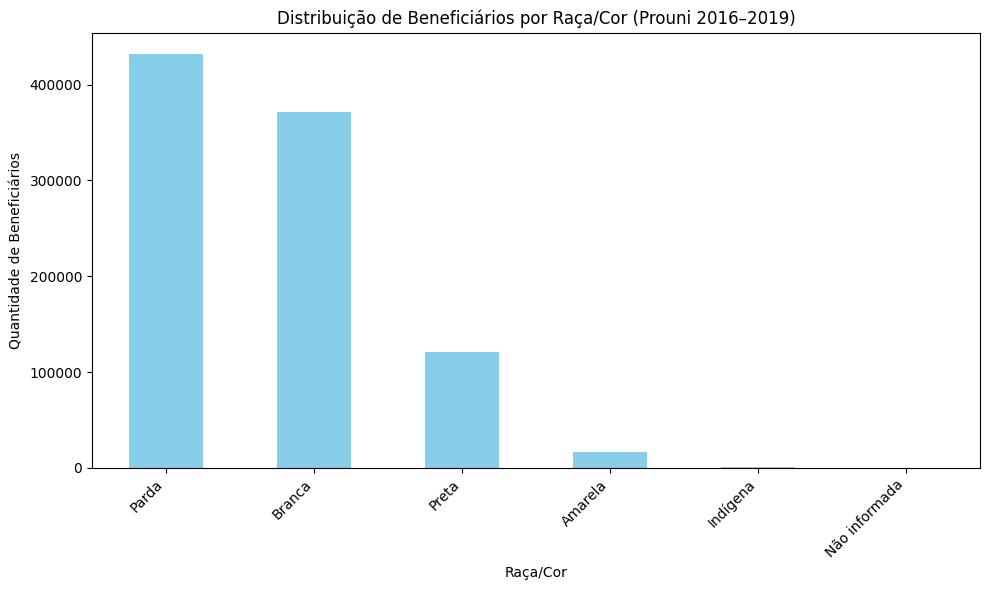

In [39]:
# Criar um gráfico de barras para a distribuição por raça
plt.figure(figsize=(10, 6))
raca_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Beneficiários por Raça/Cor (Prouni 2016–2019)')
plt.xlabel('Raça/Cor')
plt.ylabel('Quantidade de Beneficiários')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A análise da variável raça/cor evidencia a importância do Prouni na promoção da diversidade racial no ensino superior.
Os dados mostram que, embora a população branca ainda represente a maior parcela dos beneficiários, há uma presença significativa de estudantes pretos, pardos e indígenas, indicando avanços concretos na inclusão social e racial.

Essa diversidade reflete o impacto das políticas afirmativas e de cotas, que têm contribuído para reduzir desigualdades históricas no acesso à educação.
No entanto, a diferença percentual ainda é expressiva, o que sugere que grupos racialmente minorizados ainda enfrentam barreiras estruturais — como renda, localização geográfica e acesso a escolas de qualidade — que dificultam a entrada e a permanência na universidade.

In [35]:
# Padronizar a coluna de região
df["REGIAO_BENEFICIARIO_BOLSA"] = df["REGIAO_BENEFICIARIO_BOLSA"].str.strip().str.upper()

# Contar o número de beneficiários por região
regiao_counts = df["REGIAO_BENEFICIARIO_BOLSA"].value_counts()
regiao_percent = (regiao_counts / regiao_counts.sum()) * 100
print("Distribuição por Região (Prouni 2016–2019):\n")
print(pd.concat([regiao_counts, regiao_percent.round(2)], axis=1, keys=["Quantidade", "Percentual (%)"]))

Distribuição por Região (Prouni 2016–2019):

                           Quantidade  Percentual (%)
REGIAO_BENEFICIARIO_BOLSA                            
SUDESTE                        420125           44.58
NORDESTE                       200083           21.23
SUL                            166509           17.67
CENTRO-OESTE                    83644            8.88
NORTE                           72080            7.65


A análise regional mostra uma concentração expressiva de beneficiários nas regiões Sudeste e Nordeste, seguidas pelo Sul, Norte e Centro-Oeste.
Essa distribuição está diretamente relacionada à densidade populacional e à concentração de instituições de ensino superior nessas regiões.

O Sudeste, por abrigar os maiores centros urbanos e universitários do país, tende a concentrar mais bolsas.
Já o Nordeste se destaca pela forte adesão ao programa, o que demonstra o impacto positivo do Prouni em regiões historicamente marcadas por maiores desigualdades socioeconômicas.

Por outro lado, as regiões Norte e Centro-Oeste apresentam menor participação, o que pode estar ligado à disponibilidade limitada de instituições credenciadas e à dispersão geográfica das populações nessas áreas.

In [36]:
# Padronizar o texto
df["TIPO_BOLSA"] = df["TIPO_BOLSA"].str.strip().str.upper()

# Contar o número de beneficiários por tipo de bolsa
bolsa_counts = df["TIPO_BOLSA"].value_counts()
bolsa_percent = (bolsa_counts / bolsa_counts.sum()) * 100

# Exibir resultados
print("Distribuição por Tipo de Bolsa (Prouni 2016–2019):\n")
print(pd.concat([bolsa_counts, bolsa_percent.round(2)], axis=1, keys=["Quantidade", "Percentual (%)"]))

Distribuição por Tipo de Bolsa (Prouni 2016–2019):

                   Quantidade  Percentual (%)
TIPO_BOLSA                                   
BOLSA INTEGRAL         641786            68.1
BOLSA PARCIAL 50%      300655            31.9


A análise da variável TIPO_BOLSA mostra que o Prouni desempenha papel essencial na democratização do ensino superior privado no Brasil, atendendo dois grandes públicos:

1. Estudantes de baixa renda, que recebem bolsa integral (100%);


2. Estudantes de renda intermediária, que recebem bolsa parcial (50%).



Nos dados analisados, observa-se que a maior parte das bolsas é integral, o que reforça o foco social do programa em atender estudantes com maior vulnerabilidade econômica. Essa predominância indica que o Prouni tem sido um instrumento eficaz para garantir o acesso de jovens de baixa renda à universidade, especialmente aqueles que dificilmente poderiam arcar com mensalidades, mesmo reduzidas.

Já as bolsas parciais (50%), embora em menor número, também têm papel relevante: muitas vezes funcionam como complemento para famílias com renda um pouco acima do limite de vulnerabilidade, mas que ainda assim precisam de apoio para custear o ensino superior.


In [37]:
# Padronizar a coluna de modalidade de ensino
df['MODALIDADE_ENSINO_BOLSA'] = df['MODALIDADE_ENSINO_BOLSA'].str.strip().str.upper()

# Filtrar o DataFrame para incluir apenas bolsas na modalidade EAD
bolsas_ead = df[df['MODALIDADE_ENSINO_BOLSA'].isin(['EDUCAÇÃO A DISTÂNCIA', 'EAD', 'CURSO A DISTANCIA'])].copy()

coursetype_mapping = {'EDUCAÇÃO A DISTÂNCIA': 'EAD', 'EAD': 'EAD', 'CURSO A DISTANCIA': 'EAD'}
bolsas_ead.loc[:, 'MODALIDADE_ENSINO_BOLSA'] = bolsas_ead['MODALIDADE_ENSINO_BOLSA'].replace(coursetype_mapping)

# Contar o número de bolsas EAD por ano
ead_por_ano = bolsas_ead['ANO_CONCESSAO_BOLSA'].value_counts().sort_index()
print("Quantidade de bolsas EAD concedidas por ano:")
print(ead_por_ano)

Quantidade de bolsas EAD concedidas por ano:
ANO_CONCESSAO_BOLSA
2016    47865
2017    52239
2018    57330
2019    67250
Name: count, dtype: int64


In [38]:
# Os valores únicos na coluna de modalidade de ensino
print("Valores únicos na coluna MODALIDADE_ENSINO_BOLSA:")
print(df['MODALIDADE_ENSINO_BOLSA'].unique())

print("\nAnos presentes no DataFrame original:")
print(df['ANO_CONCESSAO_BOLSA'].unique())

Valores únicos na coluna MODALIDADE_ENSINO_BOLSA:
['PRESENCIAL' 'EDUCAÇÃO A DISTÂNCIA' 'EAD']

Anos presentes no DataFrame original:
[2016 2017 2018 2019]


 A quantidade de bolsas Prouni na modalidade Educação a Distância (EAD) apresentou um crescimento constante e significativo no período de 2016 a 2019. O número de bolsas concedidas em EAD aumentou de 47.865 em 2016 para 67.250 em 2019.

Esse aumento sugere uma maior popularização e expansão da modalidade de ensino a distância no Prouni ao longo desses anos, possivelmente impulsionada pela flexibilidade, menor custo percebido e maior oferta de cursos EAD pelas instituições. Isso demonstra que a modalidade a distância se tornou uma via cada vez mais relevante para o acesso ao ensino superior via Prouni no Brasil.